In [1]:
import pandas as pd
import numpy as np

In [2]:
movie_data = pd.read_csv(r"C:\Users\sasha\Desktop\Python\Python_Tutorial\Statistics\DataSet\IMDB Dataset.csv")
movie_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
movie_data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [4]:
movie_data.shape

(50000, 2)

In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
movie_data.duplicated().sum()

418

In [7]:
movie_data = movie_data.drop_duplicates()

In [8]:
movie_data.duplicated().sum()

0

In [9]:
movie_data.shape

(49582, 2)

# Cleaning in Textual Data

### Step 1

In this we follow few hard coded stpes to clean the textual data for the sentimental analysis.
- lowercase
- removing leading and trailing spaces
- removing html tags
- removing urls 
- expanding abbreviation 
- spelling correction 
- punctuation 
- removing special charater

### step 2 - Data preprocessing 

In this data preprocessing step , We will format the data in such manner that we can easily apply the machine learning model on it and it will help us in doing the data preprocessing.

- Tokenization:- It is the smallest possible part of the sentense.We will tokenize on the basis of words.
- stopword removal:- and,i,have etc.
- stemming:- we will change the word in root word format like dance,danced,dancing- dance(root form)

### Step 3- EDA

### Step4 - Make New Feature

### Step5 - Vectorization 

ML model work only for number but we have reviews as words.So in the process of vectorization we will convert the 
words into number 

### Step6- Modelling 

### Step7- Evaluation

### Step8 - Deployment

### Step9 - Monitor

In [10]:
movie_data1 = movie_data.iloc[0:10000]

In [11]:
movie_data1.shape

(10000, 2)

# Cleaning

In [12]:
# This is not the permanent operation and we need to reassign it in the same dataframe
movie_data1['review'] = movie_data1['review'].str.lower()

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\3410317388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data1['review'] = movie_data1['review'].str.lower()


In [13]:
# Remove white spaces
movie_data1['review'] = movie_data1['review'].str.strip()

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\2241789375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data1['review'] = movie_data1['review'].str.strip()


In [14]:
movie_data1

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
10012,i was pleasantly surprised to find that how to...,positive
10013,this is a very moving film that takes a new tw...,positive
10014,apart from the beautiful imagery thanks to new...,negative
10015,this is a perfect series for family viewing. w...,positive


In [15]:
# Removing html tag -- We are using regular expression to remove the html tags in python.
import re
def remove_html(data):
    data = re.sub(r'<.*?>','',data)
    return data
remove_html('<p>This is Sahil Sharma</p><br></br>')

'This is Sahil Sharma'

In [16]:
movie_data1['review'] = movie_data1['review'].apply(remove_html) 
# movie_data1['review'].str.replace(r'<.*?>','')  --> Its not working doubt

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\3847524954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data1['review'] = movie_data1['review'].apply(remove_html)


In [17]:
movie_data1.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [18]:
def removal_url(data):
    data = re.sub(r'https?://\S+|www\.\S+','',data)
    return data

In [19]:
removal_url('log in to register http://campusx.in')

'log in to register '

In [20]:
# Here we can check whether the dataset contains any url or not.
movie_data1[movie_data1['review'].str.contains('https?://\S+|www\.\S+')].iloc[3].values

array(['i really think i should make my case and have every(horror and or cult)movie-buff go and see this movie...i did!it-is-excellent: very atmospheric and unsettling and scary...incridible how they could make such a gem of a film with the very low(read-"no"!)-budget they had....synopsis taken from website: "one morning, an old man wanders out into the woods in search of his runaway cat. he finds instead a child without parents and a murder with no corpse..."on this website(imdb) there is no trailer, but i will leave a link here to the site of the movie itself where there is a trailer which is quite unsettling so please go and check it out...www.softfordigging.com',
       'positive'], dtype=object)

In [21]:
# To remove or replace the URL from the columns
# movie_data1['review'] = movie_data1['review'].str.replace('https?://\S+|www\.\S+','') -- This is not working(Doubt)
movie_data1['review'] = movie_data1['review'].apply(removal_url)

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\3701126422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data1['review'] = movie_data1['review'].apply(removal_url)


In [22]:
movie_data1['review'].iloc[907]

"following directly from where the story left off in part one, the second half which sets about telling the inevitable downfall and much more grim side of the man's legacy is exactly as such. in direct contrast to the first feature, part two represents a shift from che the pride and glory of a revolutionised country, to che\x97struggling liberator of a country to which he has no previous ties. the change of setting isn't just aesthetic; from the autumn and spring greys of the woodlands comes a change of tone and heart to the feature, replacing the optimism of the predecessor with a cynical, battered and bruised reality aligned to an all new struggle. yet, as che would go on to say himself\x97such a struggle is best told exactly as that\x97a struggle. while part one certainly helped document that initial surge to power that the revolutionary guerrilla acquired through just that, part two takes a much more refined, callous and bleak segment of che's life and ambition, and gives it an ass

In [23]:
# Expanding abbreviation
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data = re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    data = re.sub(r"who'll","Who Will", data)
    
    return data

In [24]:
movie_data1['review']= movie_data1['review'].apply(remove_abb)

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\3122220134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data1['review']= movie_data1['review'].apply(remove_abb)


In [25]:
movie_data1['review'].iloc[11]

'i saw this movie when i was about 12 when it came out. i recall the scariest scene was the big bird eating men dangling helplessly from parachutes right out of the air. the horror. the horror.as a young kid going to these cheesy b films on saturday afternoons, i still was tired of the formula for these monster type movies that usually included the hero, a beautiful woman who might be the daughter of a professor and a happy resolution when the monster died in the end. i did not care much for the romantic angle as a 12 year old and the predictable plots. i love them now for the unintentional humor.but, about a year or so later, i saw psycho when it came out and i loved that the star, janet leigh, was bumped off early in the film. i sat up and took notice at that point. since screenwriters are making up the story, make it up to be as scary as possible and not from a well-worn formula. there are no rules.'

In [26]:
movie_data1

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
10012,i was pleasantly surprised to find that how to...,positive
10013,this is a very moving film that takes a new tw...,positive
10014,apart from the beautiful imagery thanks to new...,negative
10015,this is a perfect series for family viewing. w...,positive


In [27]:
movie_data2 = movie_data1.iloc[0:100]

In [28]:
movie_data2.shape

(100, 2)

In [29]:
# Now the next part of data cleaning is SPELLING CORRECTION so we have to correct each spelling which is worng in our 
# review columns so for that We have one in-built libaray called Textblob that we will used to correct the spelling and 
# make our work easy.

# from package import class
from textblob import TextBlob
text = 'hi i can drve at nigt'
TextBlob(text).correct().string

'hi i can drove at night'

In [30]:
def spelling_correction(text):
    return TextBlob(text).correct().string

In [31]:
# movie_data2['review'].apply(spelling_correction)

In [32]:
# movie_data2['review'] = movie_data2['review'].apply(spelling_correction)

In [33]:
# Handling Punctuation mark
import string
str_punc = string.punctuation
str_punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
    return text

In [35]:
remove_punctuation('Hi there! My name is Sahil Sharma?')

'Hi there My name is Sahil Sharma'

In [36]:
movie_data1['review'] = movie_data1['review'].apply(remove_punctuation)

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\264459322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data1['review'] = movie_data1['review'].apply(remove_punctuation)


In [37]:
movie_data1['review'].iloc[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows would not dare forget pretty p

# Data Preprocessing 

- Tokenization --> It is done on 2 levels one is on word level other one is sentense level.
- remove Stopwords(used in the end of sentense)

In [38]:
!pip install nltk

In [39]:
import nltk

In [40]:
# nltk.download()

In [41]:
import nltk
from nltk.tokenize import word_tokenize

In [42]:
movie_data1['tokenize_review'] = movie_data1['review'].apply(word_tokenize)

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\2174380614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data1['tokenize_review'] = movie_data1['review'].apply(word_tokenize)


In [43]:
movie_data1

,review,sentiment,tokenize_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."
...,...,...,...
10012,i was pleasantly surprised to find that how to...,positive,"[i, was, pleasantly, surprised, to, find, that..."
10013,this is a very moving film that takes a new tw...,positive,"[this, is, a, very, moving, film, that, takes,..."
10014,apart from the beautiful imagery thanks to new...,negative,"[apart, from, the, beautiful, imagery, thanks,..."
10015,this is a perfect series for family viewing we...,positive,"[this, is, a, perfect, series, for, family, vi..."


In [44]:
# Stop word removal - These are the words which is used to frame the sentense but does'nt have any contribution in the 
# meaning of sentense like is,the from etc.
from nltk.corpus import stopwords

In [45]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
# Here we are removing all the stopwords.
def remove_stopwords(text):
    lst = []
    for word in text:
        if word not in stopwords.words('english'):
            lst.append(word)
    return lst

In [47]:
remove_stopwords(['i','me','him','Sahil','Sharma','he','your'])

['Sahil', 'Sharma']

In [48]:
movie_data1['tokenize_review'] = movie_data1['tokenize_review'].apply(remove_stopwords)

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\3126873335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data1['tokenize_review'] = movie_data1['tokenize_review'].apply(remove_stopwords)


In [49]:
movie_data1

,review,sentiment,tokenize_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."
...,...,...,...
10012,i was pleasantly surprised to find that how to...,positive,"[pleasantly, surprised, find, lose, friends, a..."
10013,this is a very moving film that takes a new tw...,positive,"[moving, film, takes, new, twist, somewhere, r..."
10014,apart from the beautiful imagery thanks to new...,negative,"[apart, beautiful, imagery, thanks, new, zeala..."
10015,this is a perfect series for family viewing we...,positive,"[perfect, series, family, viewing, gather, aro..."


In [50]:
movie_data1['review'] = movie_data1['tokenize_review'].apply(lambda x:" ".join(x))

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\3968613478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data1['review'] = movie_data1['tokenize_review'].apply(lambda x:" ".join(x))


In [51]:
movie_data1

,review,sentiment,tokenize_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."
...,...,...,...
10012,pleasantly surprised find lose friends alienat...,positive,"[pleasantly, surprised, find, lose, friends, a..."
10013,moving film takes new twist somewhere relation...,positive,"[moving, film, takes, new, twist, somewhere, r..."
10014,apart beautiful imagery thanks new zealand cin...,negative,"[apart, beautiful, imagery, thanks, new, zeala..."
10015,perfect series family viewing gather around tv...,positive,"[perfect, series, family, viewing, gather, aro..."


# EDA AND FEATURE ENGINEERING
- distribution of text length and word count.
- common unigrams/birams/trigrams

unigrams means a single word.we count the unigrams words 

bigrams means we are taking the combination of 2 words and count them all.

trigrams means we are taking the combination of 3 words and count them all.
- wordcloud 

In [52]:
movie_data1['char_length']= movie_data1['review'].str.len()

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\2022749718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data1['char_length']= movie_data1['review'].str.len()


In [53]:
movie_data1

,review,sentiment,tokenize_review,char_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1148
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863
...,...,...,...,...
10012,pleasantly surprised find lose friends alienat...,positive,"[pleasantly, surprised, find, lose, friends, a...",668
10013,moving film takes new twist somewhere relation...,positive,"[moving, film, takes, new, twist, somewhere, r...",413
10014,apart beautiful imagery thanks new zealand cin...,negative,"[apart, beautiful, imagery, thanks, new, zeala...",1090
10015,perfect series family viewing gather around tv...,positive,"[perfect, series, family, viewing, gather, aro...",1026


In [54]:
movie_data1['word_length'] = movie_data1['tokenize_review'].apply(len)

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\1821338266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data1['word_length'] = movie_data1['tokenize_review'].apply(len)


In [55]:
movie_data1.head()

,review,sentiment,tokenize_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1148,168
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125


C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\308131886.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_data1['char_length'])


<Axes: xlabel='char_length', ylabel='Density'>

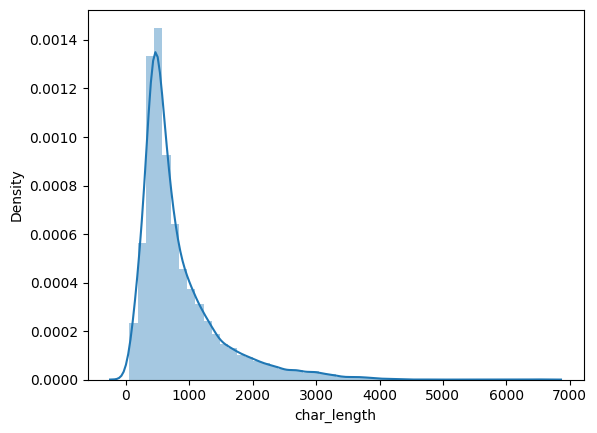

In [56]:
# This is the pdf functions.
import seaborn as sns
sns.distplot(movie_data1['char_length'])

In [57]:
p_sentiment = movie_data1[movie_data1['sentiment'] == 'positive']

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\92702265.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p_sentiment['char_length'])


<Axes: xlabel='char_length', ylabel='Density'>

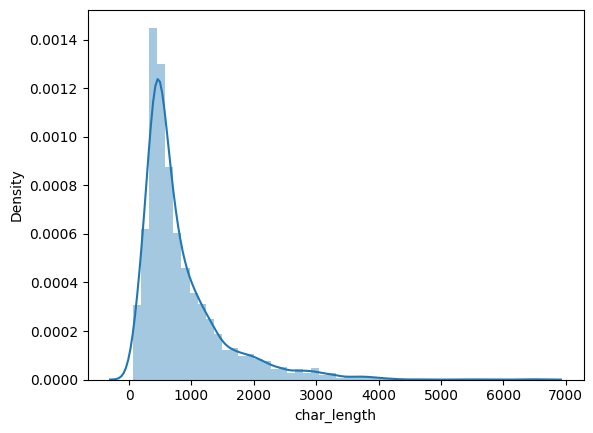

In [58]:
# graph for positve sentiment.
sns.distplot(p_sentiment['char_length'])

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\3817054778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_sentiment['char_length'])


<Axes: xlabel='char_length', ylabel='Density'>

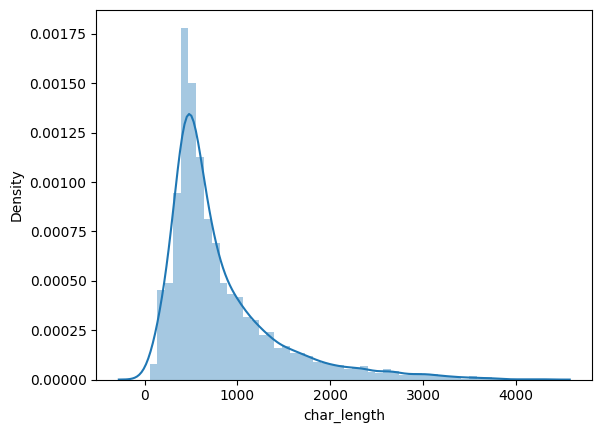

In [59]:
# graph for negative sentiment
n_sentiment = movie_data1[movie_data1['sentiment']=='negative']
sns.distplot(n_sentiment['char_length'])

C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\1936421399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p_sentiment['char_length'])
C:\Users\sasha\AppData\Local\Temp\ipykernel_17232\1936421399.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_sentiment['char_length'])


<Axes: xlabel='char_length', ylabel='Density'>

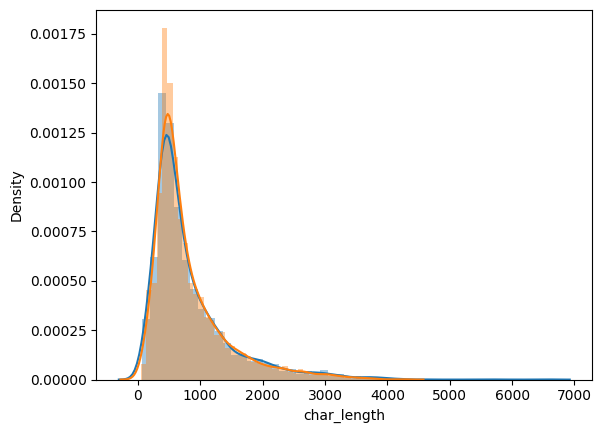

In [60]:
sns.distplot(p_sentiment['char_length'])
sns.distplot(n_sentiment['char_length'])

In [61]:
movie_data1['tokenize_review'].sum()

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go

In [62]:
movie_data1

,review,sentiment,tokenize_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1148,168
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125
...,...,...,...,...,...
10012,pleasantly surprised find lose friends alienat...,positive,"[pleasantly, surprised, find, lose, friends, a...",668,84
10013,moving film takes new twist somewhere relation...,positive,"[moving, film, takes, new, twist, somewhere, r...",413,59
10014,apart beautiful imagery thanks new zealand cin...,negative,"[apart, beautiful, imagery, thanks, new, zeala...",1090,155
10015,perfect series family viewing gather around tv...,positive,"[perfect, series, family, viewing, gather, aro...",1026,149


In [63]:
from nltk import ngrams
pd.Series(ngrams(movie_data1['tokenize_review'].sum(),2)).value_counts()

(I, would)                492
(ever, seen)              459
(special, effects)        438
(I, seen)                 429
(even, though)            372
                         ... 
(liven, party)              1
(party, upwith)             1
(upwith, absolutely)        1
(connection, original)      1
(hurt, yet)                 1
Name: count, Length: 845131, dtype: int64

In [64]:
pd.Series(ngrams(movie_data1['tokenize_review'].sum(),3)).value_counts()

(I, ever, seen)             169
(worst, movie, ever)         69
(movie, ever, seen)          56
(I, would, like)             56
(one, worst, movies)         55
                           ... 
(tedious, four, hours)        1
(four, hours, left)           1
(hours, left, long)           1
(left, long, succession)      1
(head, hurt, yet)             1
Name: count, Length: 1149712, dtype: int64

In [ ]:
# Wordcloud

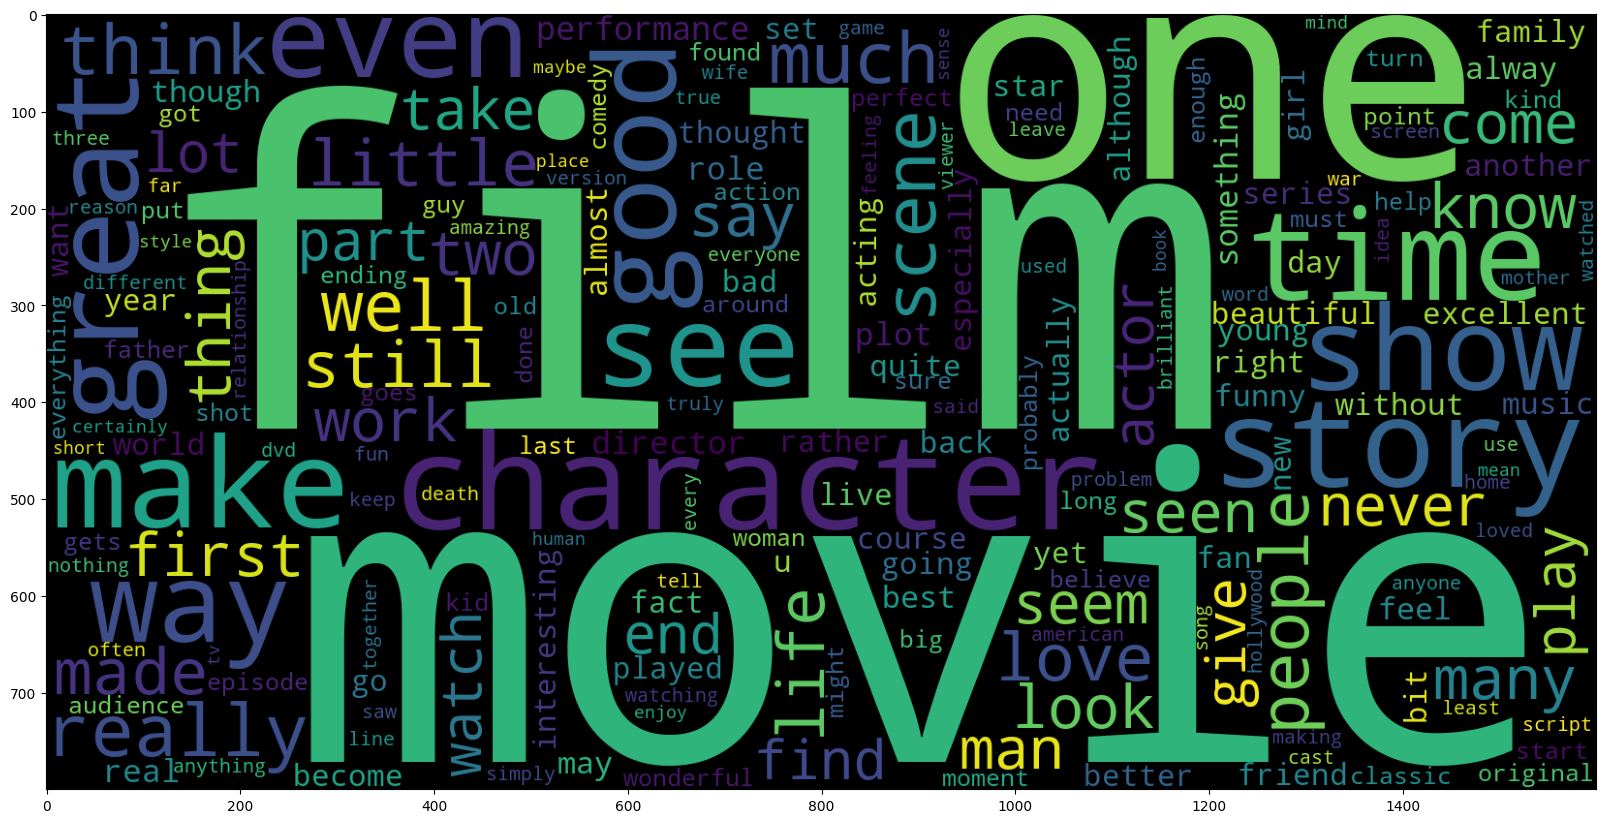

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
wc = WordCloud(width=1600,height=800).generate(" ".join(movie_data1[movie_data1['sentiment'] == 'positive']['review']))
plt.imshow(wc)

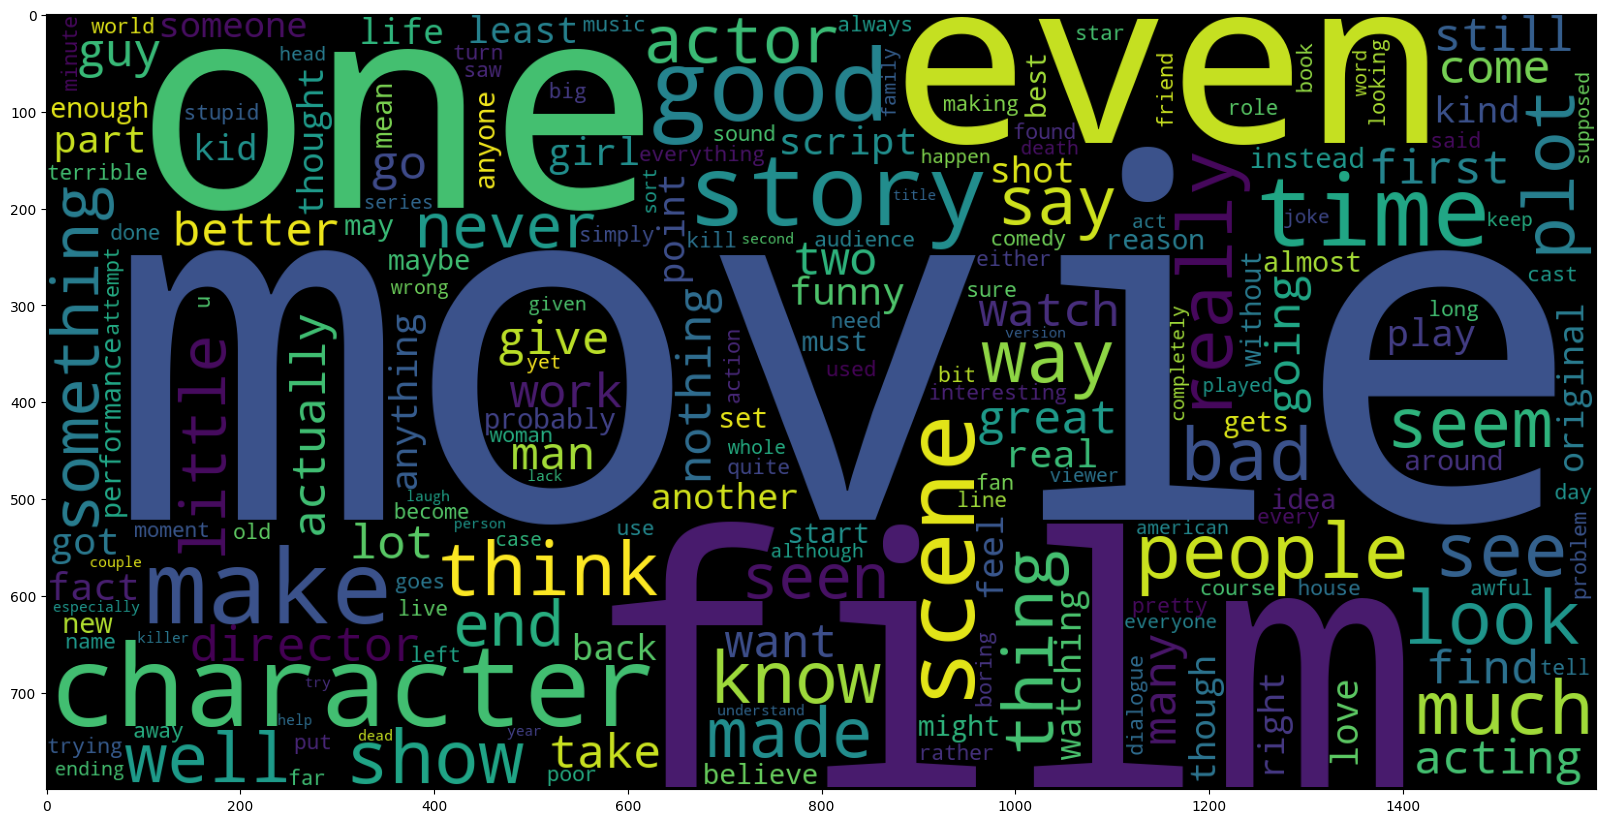

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
wc = WordCloud(width=1600,height=800).generate(" ".join(movie_data1[movie_data1['sentiment'] == 'negative']['review']))
plt.imshow(wc)